# EXERCISE

In this exercise, a study of alcohol consumption in students belonging to different courses will be carried out, specifically, to students belonging to a mathematics course.
The baseline data has been collected from a survey of high school students.
The data set has been obtained from: https://www.kaggle.com/uciml/student-alcohol-consumption/home which cites as its source:
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th Future Business TeChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

The different columns that appear correspond to:

* **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* **sex** - student's gender (binary: 'F' - female or 'M' - male)
* **age** - age of the student (number: from 15 to 22)
* **address** - type of student's address (binary: 'U' - urban or 'R' - rural)
* **famsize** - family size (binary: 'LE3' - less than or equal to 3 or 'GT3' - greater than 3)
* **Pstatus** - parents' cohabitation status (binary: 'T' - living together or 'A' - separated)
* **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - from 5th to 9th grade, 3 - secondary education or 4 - higher education)
* **Mjob** - mother's job (nominal: teacher: 'teacher', health related: 'health', civil services: 'services' (eg administrative or police), householder:' at_home 'or other:' other ')
* **Fjob** - father's job (nominal: teacher: 'teacher', health related: 'health', civil services: 'services' (eg administrative or police), householder: 'at_home' or other: 'other')
* **reason** - reason for studying at this school (nominal: proximity to your home: 'home', school reputation: 'reputation', course preference: 'course' or other: 'other')
* **guardian** - legal custodian of the student (nominal: mother: 'mother', father: 'father' or other: 'other')
* **traveltime** - travel time home to school (numbers: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 -> 1 hour)
* **studytime** - weekly time devoted to study (numbers: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 -> 10 hours)
* **failures** - number of previous failures (number: n if 1 <= n <3, otherwise 4)
* **schoolsup** - additional training support to classes (binary: yes or no)
* **famsup** - family educational support (binary: yes or no)
* **paid** - Extra classes hired on the subject studied (Mathematics) (binary: yes or no)
* **activities** - extra-curricular activities (binary: yes or no)
* **nursery** - has attended the infirmary (binary: yes or no)
* **higher** - if you want to study higher education (binary: yes or no)
* **internet** - internet access from home (binary: yes or no)
* **romantic** - romantic relationship (binary: yes or no)
* **famrel** - quality of family relationships (number: 1 - very bad to 5 - excellent)
* **freetime** - free time after school (number: 1 - very little to 5 - very high)
* **goout** - go out with friends (numeric: From 1 - very little to 5 - very high)
* **Dalc** - alcohol consumption during weekdays (numerical: from 1 - very low to 5 - very high)
* **Walk** - alcohol consumption at the weekend (numerical: from 1 - very low to 5 - very high)
* **health** - current state of your health (number: from 1 - very bad to 5 - very good)
* **absences** - number of absences from school (number: from 0 to 93)
* **G1** - first semester grades (numbers: from 0 to 20)
* **G2** - grades for the second semester (numbers: from 0 to 20)
* **G3** - row note (numeric: from 0 to 20, output target)

## 1. Data preparation

First of all, we proceed to import the data and find out what columns are in the csv

In [1]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# Load dataset
path = "student-mat.csv"
dataset_mat = pd.read_csv(path, sep=";")

Visualize the first 5 rows (.head() function)

In [2]:
# Visualization
dataset_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


These are the columns:

In [3]:
dataset_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Categorical variables are also divided into binary and multiclass.

---
 Next, we identify categorical variables that are
 - ordinal (which include ordinal multiclass and some binary that can also be considered ordinal)
 - non-ordinal variables,
 - and continuous ones.

In [4]:
list_binary = ['sex', 'school', 'address', 'Pstatus', 'schoolsup', 'famsup',
               'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

list_ord = ['famsize', 'Medu', 'Fedu', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'traveltime', 'studytime', 'failures',
            'goout', 'Dalc', 'Walc', 'health', 'famrel', 'freetime']

list_multi_not_ord = ['Mjob', 'Fjob', 'reason', 'guardian']
list_not_ord = [x for x in list_binary if x not in list_ord] + list_multi_not_ord

list_cont = [x for x in dataset_mat.columns if x not in list_ord + list_not_ord]
print(list_cont)

['age', 'absences', 'G1', 'G2', 'G3']


## 2. EDA (Exploratory Data Analysis)

Before considering building any model, it is convenient to study and investigate the dataset to better understand it, see what characterized it and thus be able to ask questions about it that can be answered with the use of different ML models.

### 2.1. EDA (univariate)

In the first section of the EDA, let's analyze the variables with an isloated approach. This is known as **univariate data analysis**.

This first analysis will focus on visualizations for the distribution of categorical variables through **piecharts**, and **histograms** to see h*ow the numerical variables are distributed*.



#### Categorical features

<ipython-input-5-6412d0f0fc21>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


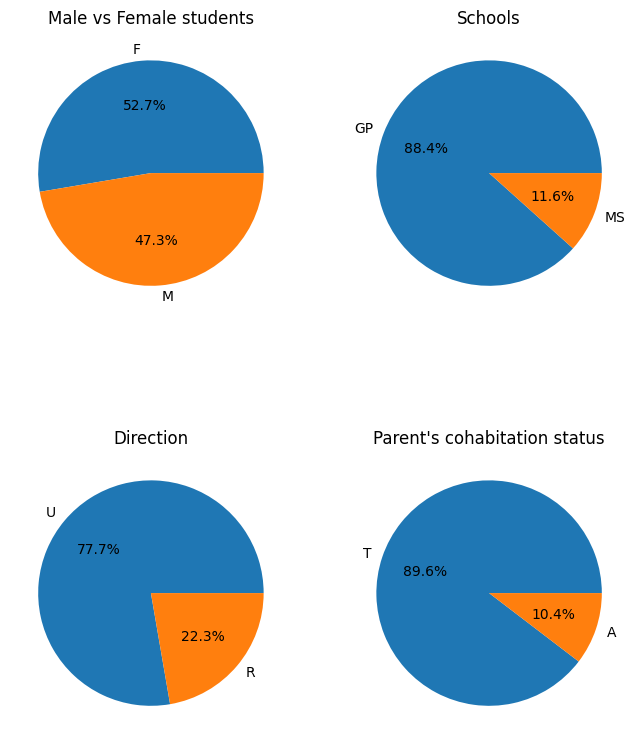

In [5]:
# Pie charts
f, ax = plt.subplots(figsize=(8,10))

# Sex
feature_used = 'sex'

plt.subplot(2, 2, 1)
plt.title("Male vs Female students")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# School
feature_used = 'school'

plt.subplot(2, 2, 2)
plt.title("Schools")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Romantic relationship
feature_used = 'address'

plt.subplot(2, 2, 3)
plt.title("Direction")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Parent's cohabitation status
feature_used = 'Pstatus'

plt.subplot(2, 2, 4)
plt.title("Parent's cohabitation status")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

plt.show()

<ipython-input-6-bd33f7d3be52>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


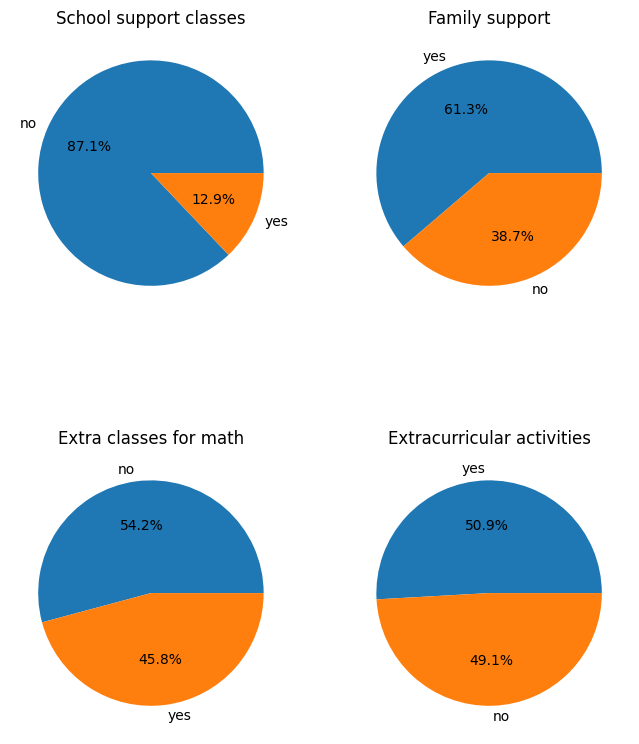

In [6]:
# Pie charts
f, ax = plt.subplots(figsize=(8,10))

# School support classes
feature_used = 'schoolsup'

plt.subplot(2, 2, 1)
plt.title("School support classes")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Family support
feature_used = 'famsup'

plt.subplot(2, 2, 2)
plt.title("Family support")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Extra classes for math
feature_used = 'paid'

plt.subplot(2, 2, 3)
plt.title("Extra classes for math")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Extracurricular activities
feature_used = 'activities'

plt.subplot(2, 2, 4)
plt.title("Extracurricular activities")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

plt.show()

<ipython-input-7-164f36eda75c>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


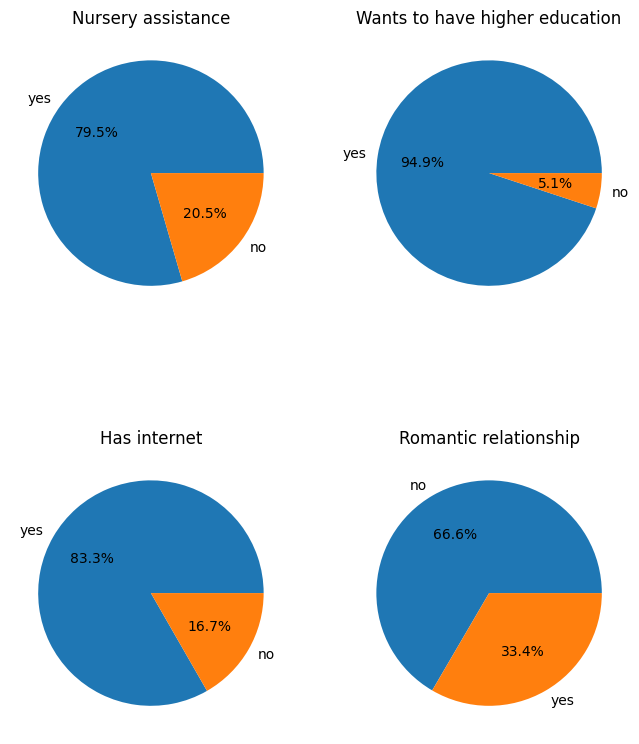

In [7]:
# Pie charts
f, ax = plt.subplots(figsize=(8,10))

# Nursery assistance
feature_used = 'nursery'

plt.subplot(2, 2, 1)
plt.title("Nursery assistance")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Wants to have higher education
feature_used = 'higher'

plt.subplot(2, 2, 2)
plt.title("Wants to have higher education")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Has internet
feature_used = 'internet'

plt.subplot(2, 2, 3)
plt.title("Has internet")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Romantic relationship
feature_used = 'romantic'

plt.subplot(2, 2, 4)
plt.title("Romantic relationship")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

plt.show()

<ipython-input-8-426ca0c5f9bf>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


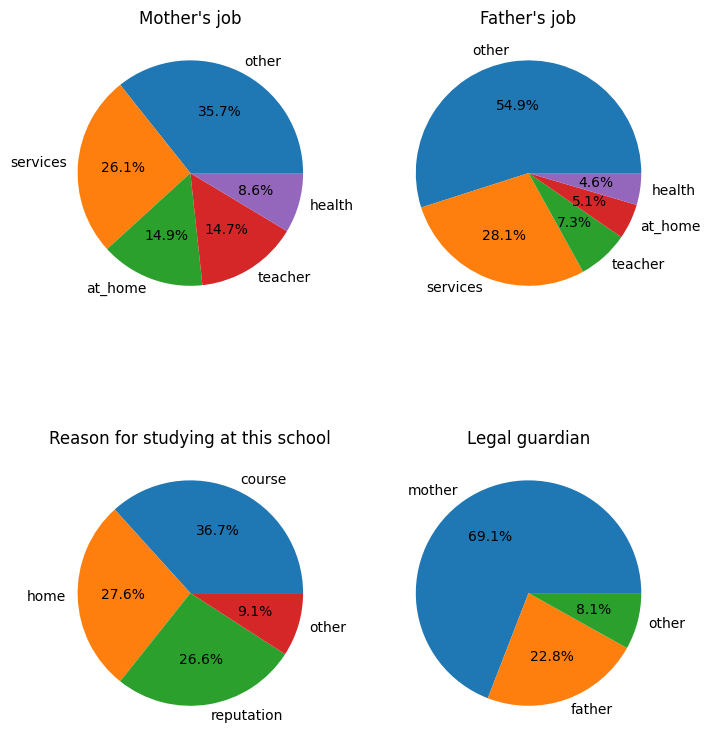

In [8]:
# Pie charts
f, ax = plt.subplots(figsize=(8,10))

# Mother's job
feature_used = 'Mjob'

plt.subplot(2, 2, 1)
plt.title("Mother's job")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Father's job
feature_used = 'Fjob'

plt.subplot(2, 2, 2)
plt.title("Father's job")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Reason for studying at this school
feature_used = 'reason'

plt.subplot(2, 2, 3)
plt.title("Reason for studying at this school")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Legal guardian
feature_used = 'guardian'

plt.subplot(2, 2, 4)
plt.title("Legal guardian")
sums = dataset_mat[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

plt.show()

#### Numerical features

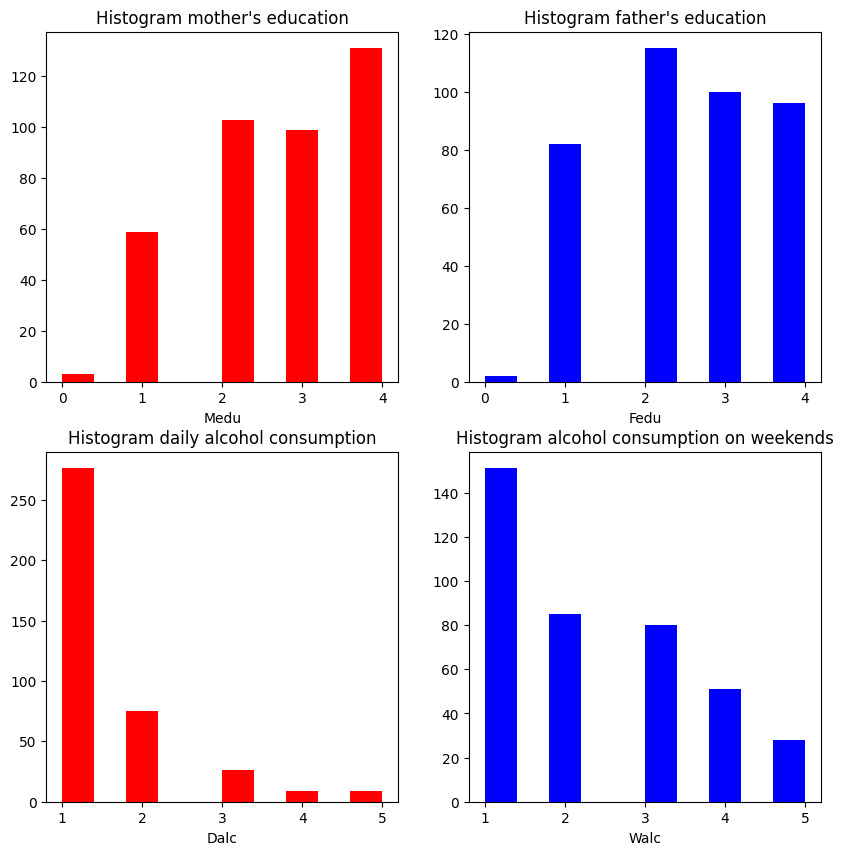

In [10]:
# Histogramas

# Size of the representations
plt.figure(figsize=(10,10))

# Histograma mother's education
plt.subplot(2, 2, 1)
plt.hist(dataset_mat['Medu'], color='red')
plt.title("Histogram mother's education")
plt.xlabel("Medu")

plt.subplot(2, 2, 2)
plt.hist(dataset_mat['Fedu'], color = 'blue')
plt.title("Histogram father's education")
plt.xlabel('Fedu')


# Histograma Walc/Dalc
plt.subplot(2, 2, 3)
plt.hist(dataset_mat['Dalc'], color = 'red')
plt.title('Histogram daily alcohol consumption')
plt.xlabel('Dalc')


plt.subplot(2, 2, 4)
plt.hist(dataset_mat['Walc'], color = 'blue')
plt.title('Histogram alcohol consumption on weekends')
plt.xlabel('Walc')


plt.show()

In these histograms it can be seen how the data belonging to each of the visualized classes do not always have the same importance. In fact, it can be seen that, for example, that there are very few parents who do not have an educational level of at least elementary school. In the same way, it is seen that most of the students do not consume alcohol either daily or on weekends. Those who consume the most are a minority, especially on a daily basis where very few do.

Text(0.5, 0, 'G3')

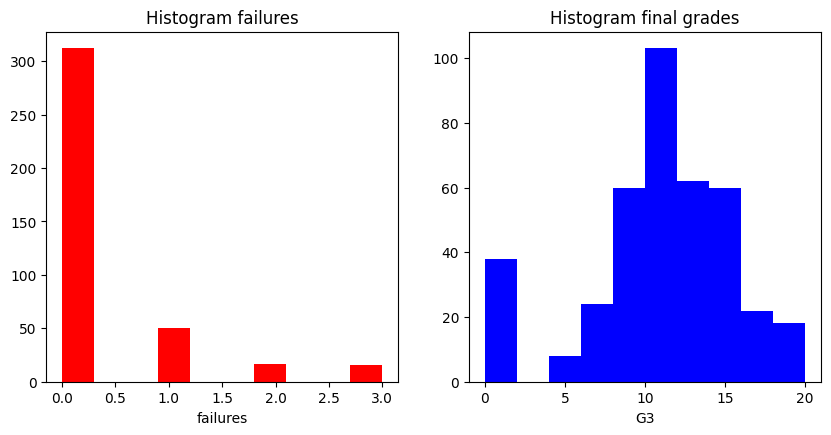

In [11]:
plt.figure(figsize=(10,10))

# Histogram G3/failures
plt.subplot(2, 2, 1)
plt.hist(dataset_mat['failures'], color = 'red')
plt.title('Histogram failures')
plt.xlabel('failures')

plt.subplot(2, 2, 2)
plt.hist(dataset_mat['G3'], color = 'blue')
plt.title('Histogram final grades')
plt.xlabel('G3')

These histograms are interesting.
- On one hand, it appears that the majority of students do not have accumulated failures.
- On the other hand, the grades follow the classic Gaussian bell (**normal distribution**) in which most of the notes are concentrated based on an average value, with a few atypical cases of extreme notes (very high or very low).

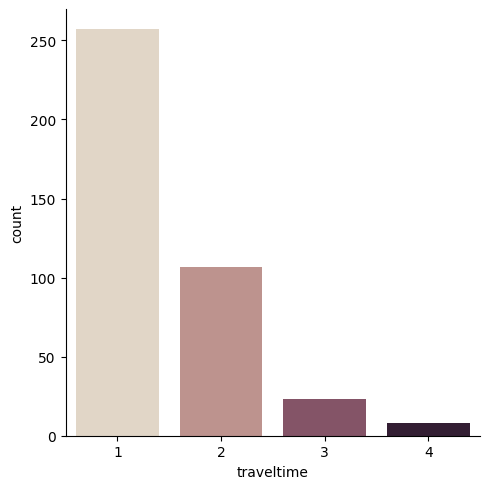

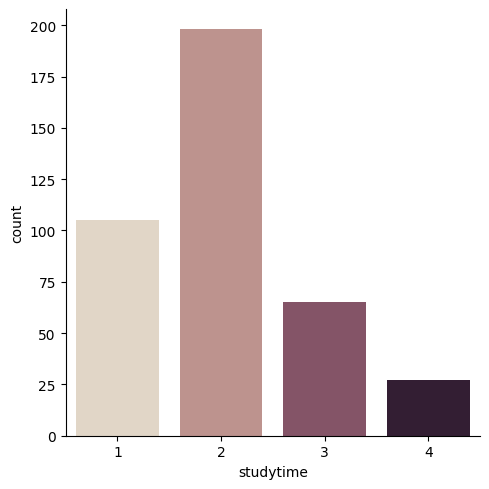

In [12]:
# Histograms with seaborn
sns.catplot(x="traveltime", kind="count", palette="ch:.25", data=dataset_mat)
sns.catplot(x="studytime", kind="count", palette="ch:.25", data=dataset_mat)
plt.show()

In these last two histograms, we can see that most of the students do not have a significant commute time to go to school, and that the majority dedicate a weekly study time of between 2 and 5 hours, with also quite a few cases of students who spend less than 2 hours.



### Anomalies detection

Another univariate analysis that can be applied for numerical variables is the detection of anomalies using a boxplot. We are going to use a boxplot because it is a **"Non-parametric" technique** (that is, it does not assume anything about the distribution of the data of the variable; it can be in any way).

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-pack

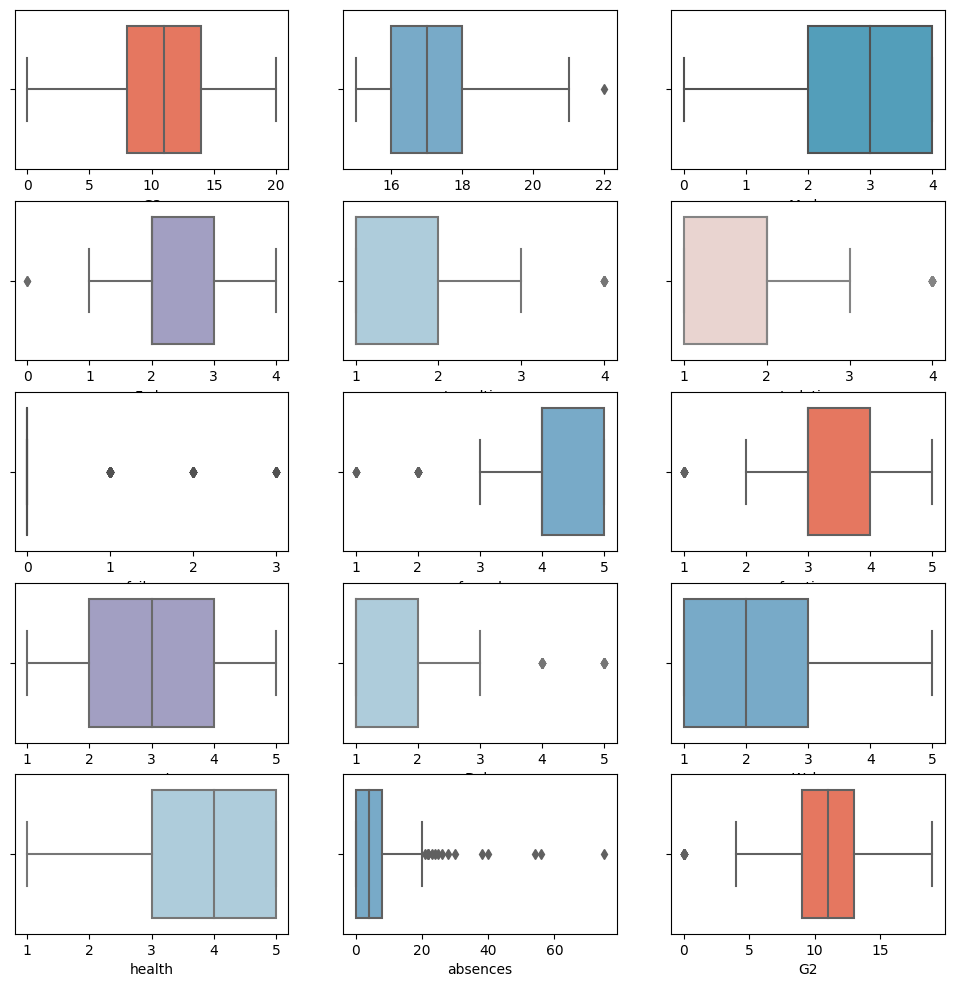

In [13]:
# Boxplots
f, axes = plt.subplots(5, 3, figsize=(12, 12))
sns.boxplot(x="G3", data=dataset_mat, orient="v", ax=axes[0][0], palette="Reds")
sns.boxplot(x= "age", data=dataset_mat,  orient='v' , ax=axes[0][1],  palette="Blues")
sns.boxplot(x= "Medu", data=dataset_mat,  orient='v' , ax=axes[0][2],  palette="GnBu_d")
sns.boxplot(x= "Fedu", data=dataset_mat,  orient='v' , ax=axes[1][0],  palette="Purples")
sns.boxplot(x= "traveltime", data=dataset_mat,  orient='v' , ax=axes[1][1],  palette="Paired")
sns.boxplot(x= "studytime", data=dataset_mat,  orient='v' , ax=axes[1][2],  palette=sns.cubehelix_palette(8))
sns.boxplot(x= "failures", data=dataset_mat,  orient='v' , ax=axes[2][0],  palette="GnBu_d")
sns.boxplot(x= "famrel", data=dataset_mat,  orient='v' , ax=axes[2][1],  palette="Blues")
sns.boxplot(x= "freetime", data=dataset_mat,  orient='v' , ax=axes[2][2],  palette="Reds")
sns.boxplot(x= "goout", data=dataset_mat,  orient='v' , ax=axes[3][0],  palette="Purples")
sns.boxplot(x= "Dalc", data=dataset_mat,  orient='v' , ax=axes[3][1],  palette="Paired")
sns.boxplot(x= "Walc", data=dataset_mat,  orient='v' , ax=axes[3][2],  palette="Blues")
sns.boxplot(x= "health", data=dataset_mat,  orient='v' , ax=axes[4][0],  palette="Paired")
sns.boxplot(x= "absences", data=dataset_mat,  orient='v' , ax=axes[4][1],  palette="Blues")
sns.boxplot(x="G2", data=dataset_mat, orient="v", ax=axes[4][2], palette="Reds")
plt.show()

In this first case, the existence of atypical values within the data in relation to themselves is studied, that is, what atypical values are within each data set separately.

**Anomaly detection** does two things.
- In the first place, for information purposes, it allows us to see the limits within which most of the data exists, and thus have more information about them. For this case, we see certain outliers in some of the boxplots used; Mainly in failures, absences, Dalc and famrel. For example, in the case of failures, we see how the usual thing is that there are no students with previous failures, and that the students who have them represent very unusual cases within the total set.

- Second, the detection of anomalies helps us to identify points that could hinder the generalizability of the model and worsen its metrics, because they are either very unrepresentative, or because they may be data that is incorrect. In this case, the treatment of anomalies can go from
  - leaving them as they are (keeping their existence in mind),
  - to eliminating them (if they are non-relevant atypical data)
  - assigning them an arbitrary value (such as the mean) so that they do not affect the models excessively.
  
  In this case, because there is not much data and because the anomalies represent relevant information for some specific students, they will be left as is.

#### Null value detection

An important step to consider before proceeding with the EDA is to see if there are null values in the data set. These are not always explicitly identified as null (NAN). Sometimes they appear as empty, with identifiers in string format (e.g. null, missing ...).

In this exercise we do not see null values, although we confirm it with dropnan from Pandas.

In [14]:
print(len(dataset_mat))
print(len(dataset_mat.dropna()))

395
395


### 2.2. Data pre-processing
Now, we have to **transform the data before some further analysis**. This implies transforming categorical variables to numeric variables in order to work with them.

**Ordinal categorical variables** are transformed manually to maintain the hierarchy.

In [15]:
# Remembering columns by type
print("Continuous features", list_cont)
print("Categorical features (ordinal)", list_ord)
print("Binary features", list_binary)
print("Categorical features (non-ordinal)", list_not_ord)
dataset_mat.head().T

Continuous features ['age', 'absences', 'G1', 'G2', 'G3']
Categorical features (ordinal) ['famsize', 'Medu', 'Fedu', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'traveltime', 'studytime', 'failures', 'goout', 'Dalc', 'Walc', 'health', 'famrel', 'freetime']
Binary features ['sex', 'school', 'address', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Categorical features (non-ordinal) ['sex', 'school', 'address', 'Pstatus', 'romantic', 'Mjob', 'Fjob', 'reason', 'guardian']


,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [16]:
for feature in list_ord:
    print(feature)
    print(dataset_mat[feature].unique())

famsize
['GT3' 'LE3']
Medu
[4 1 3 2 0]
Fedu
[4 1 2 3 0]
schoolsup
['yes' 'no']
famsup
['no' 'yes']
paid
['no' 'yes']
activities
['no' 'yes']
nursery
['yes' 'no']
higher
['yes' 'no']
internet
['no' 'yes']
traveltime
[2 1 3 4]
studytime
[2 3 1 4]
failures
[0 3 2 1]
goout
[4 3 2 1 5]
Dalc
[1 2 5 3 4]
Walc
[1 3 2 4 5]
health
[3 5 1 2 4]
famrel
[4 5 3 1 2]
freetime
[3 2 4 1 5]


In [18]:
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns', None) # To see every column

# We create a dataset with the encodings
dataset2 = dataset_mat.copy()

# Manual encoding of ordinal variables to maintain hierarchy
dataset2["famsize"] = dataset2["famsize"].replace(['LE3', 'GT3'],[0, 1])
dataset2["schoolsup"] = dataset2["schoolsup"].replace(['no', 'yes'],[0, 1])
dataset2["paid"] = dataset2["paid"].replace(['no', 'yes'],[0, 1])
dataset2["activities"] = dataset2["activities"].replace(['no', 'yes'],[0, 1])
dataset2["nursery"] = dataset2["nursery"].replace(['no', 'yes'],[0, 1])
dataset2["higher"] = dataset2["higher"].replace(['no', 'yes'],[0, 1])
dataset2["internet"] = dataset2["internet"].replace(['no', 'yes'],[0, 1])
dataset2["famsup"] = dataset2["famsup"].replace(['no', 'yes'],[0, 1])

# One Hot encoding for non-ordinal variables
enc = OneHotEncoder(drop='first')
df_aux = pd.DataFrame(enc.fit_transform(dataset2[list_not_ord]).toarray())
df_aux.columns = enc.get_feature_names_out(list_not_ord)

# Join with original dataframe after removing columns from encoding
dataset2 = dataset2.drop(columns=list_not_ord)
dataset2[df_aux.columns] = df_aux
dataset2.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sex_M,school_MS,address_U,Pstatus_T,romantic_yes,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,18,1,4,4,2,2,0,1,0,0,0,1,1,0,4,3,4,1,1,3,6,5,6,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,17,1,1,1,1,2,0,0,1,0,0,0,1,1,5,3,3,1,1,3,4,5,5,6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,0,1,1,1,2,3,1,0,1,0,1,1,1,4,3,2,2,3,3,10,7,8,10,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,15,1,4,2,1,3,0,0,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,16,1,3,3,1,2,0,0,1,1,0,1,1,0,4,3,2,1,2,5,4,6,10,10,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 3. EDA (bivariate)
In bivariate analysis, we study the relationships between pairs of variables, in order to obtain insights on the relationship between them.

### 3.1. Visualizations
Within the bivariate analysis, the evolutions of a continuous variable can be visualized as a function of one or more categorical variables, in order to obtain visual insights on the joint evolutions.

We are going to see three examples of visualizations for this:
-  boxplots
- swarmplots
- histograms.

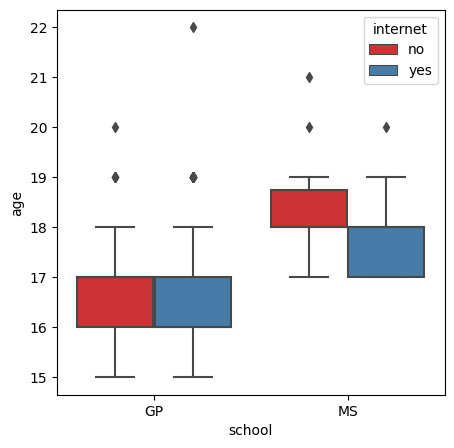

In [19]:
# Boxplot
plt.figure(figsize=(5,5))
sns.boxplot(x="school", y="age", hue="internet", data=dataset_mat, palette="Set1")
plt.show()

In this boxplot we can see the availability of internet at home for the students of the two schools based on their age. It can be seen how in the first school (0 = GP) the distribution of students with and without internet is more equitable, with some atypical values associated with older students. In the case of the second school (1 = GP), it can be seen that most of the students without internet are the oldest.



Instead of using boxplot, we can use "**swarmplots**", which display all the data points for that continuous variable combination with categorical variables. This visualization is useful if the data set is not too large, otherwise the visualization will not be readable.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


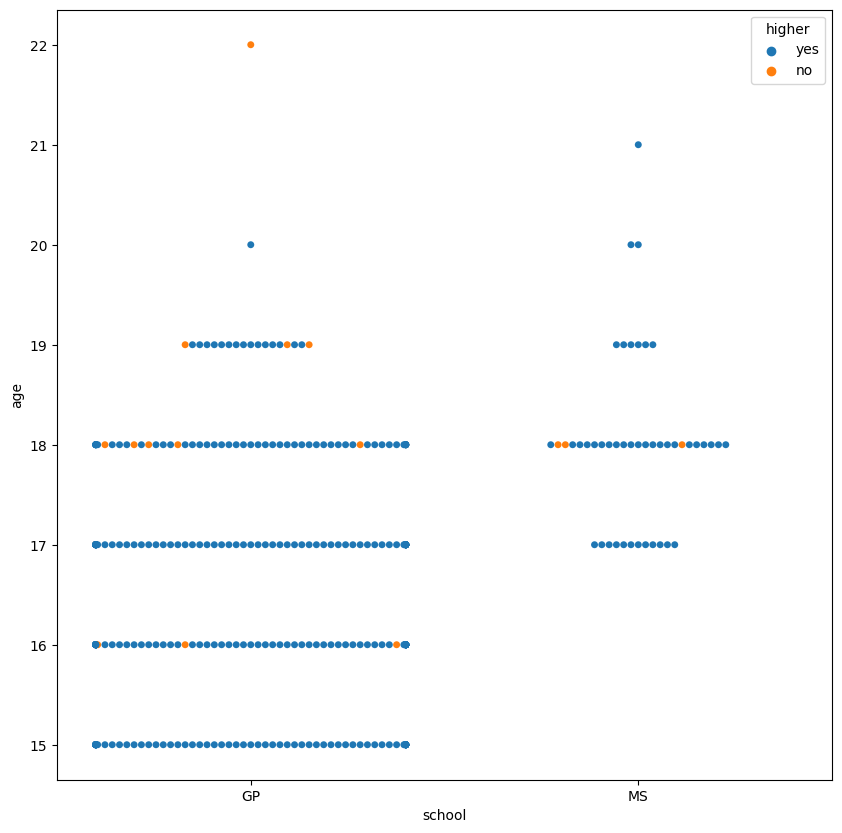

In [20]:
# Students who want to go to college
plt.figure(figsize=(10,10))
sns.swarmplot(x="school",y="age",hue="higher",data=dataset_mat)
plt.show()

# University
# 0: No
# 1: Yes

# Schools
# 0: GP
# 1: MS

This graph shows for each age and each school which students want to go to university and which ones do not. The data of wanting to go to university (higher) is related, as has been seen, with the number of failures obtained, data that in turn is related to the grades obtained, so this information is relevant. It can be seen that the majority of students want to access higher education except for some atypical cases, probably due to lack of motivation; Most of the students who do not want to are the oldest (from the first school) especially in the case of repeaters (age >= 18)

#### Effects of daily alcohol consumption
A brief study can be made to see how daily alcohol consumption affects academic performance and which profile of students is the one that usually consumes the most.

<ipython-input-46-83851764a183>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["absences"],color='red',ax=ax)


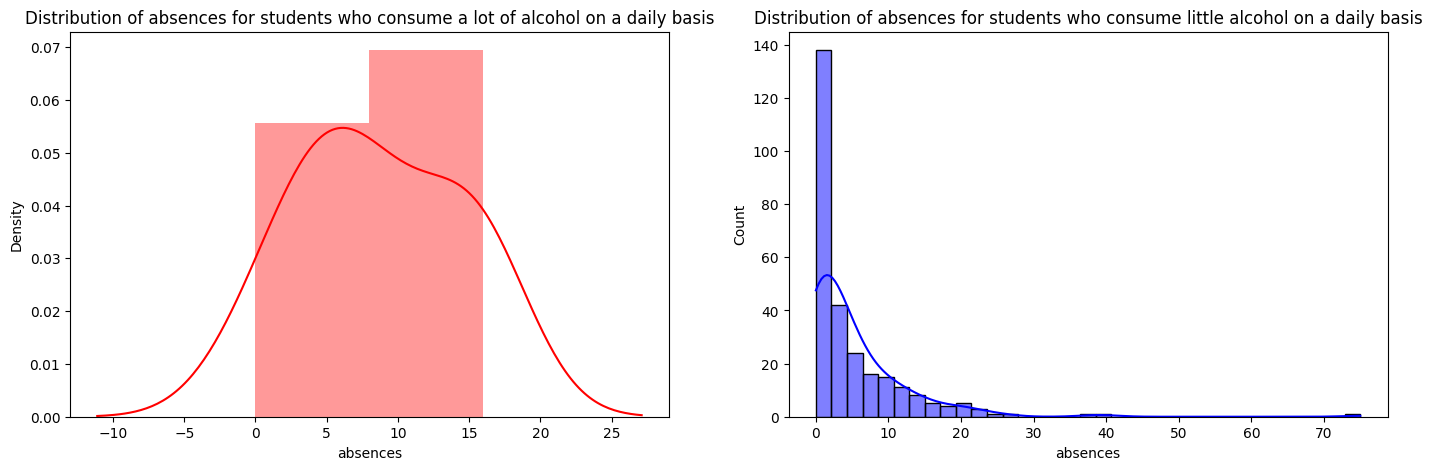

In [46]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["absences"],color='red',ax=ax)

ax.set_title('Distribution of absences for students who consume a lot of alcohol on a daily basis')

ax=f.add_subplot(122)
#sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['absences'],color='blue',ax=ax)
sns.histplot(dataset_mat[dataset_mat["Dalc"] == 1]['absences'],color='blue', kde=True)
ax.set_title('Distribution of absences for students who consume little alcohol on a daily basis')

plt.show()

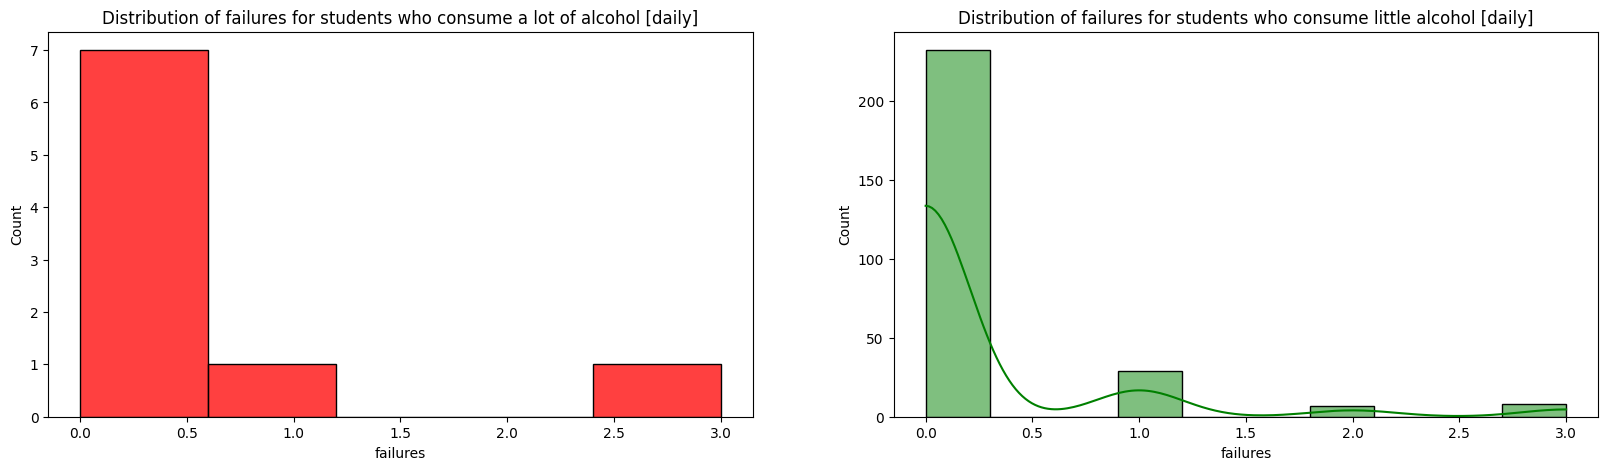

In [40]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.histplot(dataset_mat[dataset_mat["Dalc"] == 5]["failures"],color='red',ax=ax, kde_kws={'bw':0.1})
ax.set_title('Distribution of failures for students who consume a lot of alcohol [daily]')

ax=f.add_subplot(122)
sns.histplot(dataset_mat[dataset_mat["Dalc"] == 1]['failures'],color='green',kde=True, ax=ax)
ax.set_title('Distribution of failures for students who consume little alcohol [daily]')

plt.show()

Note: If an error like RuntimeError: Selected KDE bandwidth is 0 arises when executing the distplots, we can specify manually the bandwidth with kde_kws={'bw':0.1} (https://github.com/mwaskom/seaborn/issues/1990)

<ipython-input-28-3109a199c77c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["G3"],color='red',ax=ax)
<ipython-input-28-3109a199c77c>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['G3'],color='blue',ax=ax)


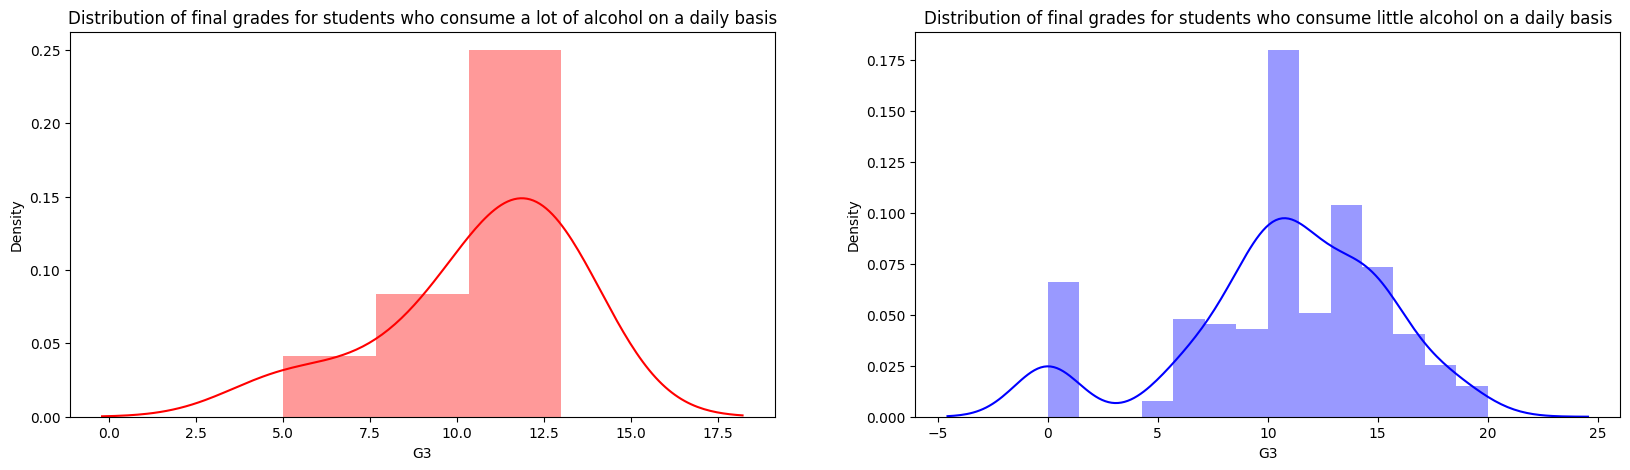

In [28]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["G3"],color='red',ax=ax)
ax.set_title('Distribution of final grades for students who consume a lot of alcohol on a daily basis')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['G3'],color='blue',ax=ax)
ax.set_title('Distribution of final grades for students who consume little alcohol on a daily basis')

plt.show()

<ipython-input-29-3109a199c77c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["G3"],color='red',ax=ax)
<ipython-input-29-3109a199c77c>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['G3'],color='blue',ax=ax)


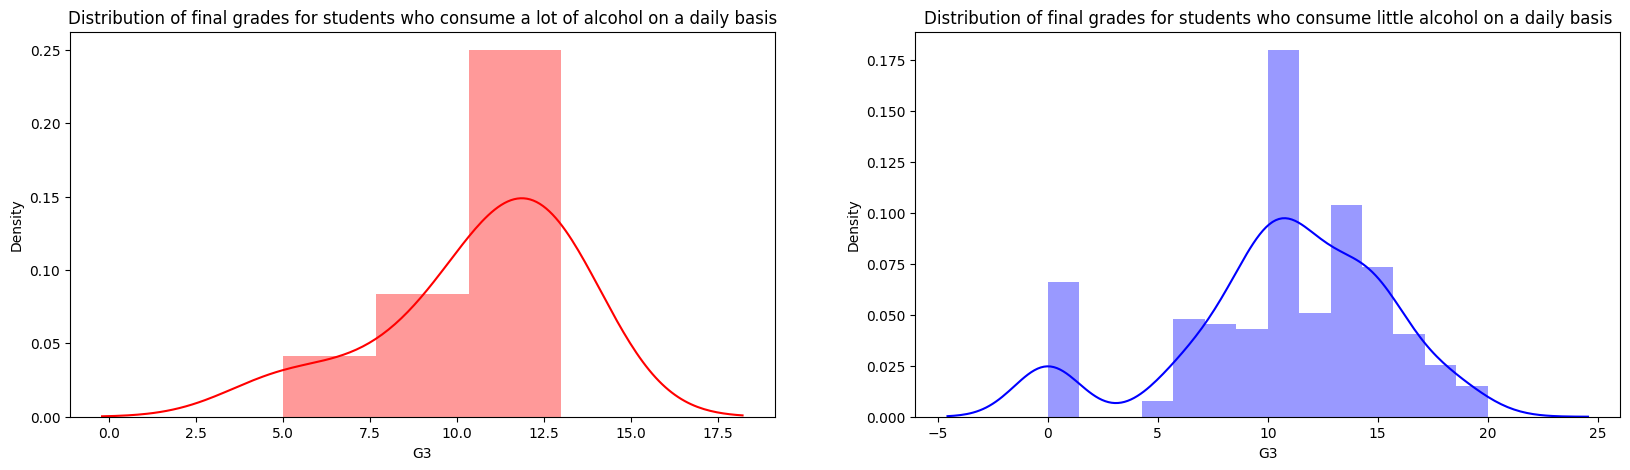

In [29]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["G3"],color='red',ax=ax)
ax.set_title('Distribution of final grades for students who consume a lot of alcohol on a daily basis')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['G3'],color='blue',ax=ax)
ax.set_title('Distribution of final grades for students who consume little alcohol on a daily basis')

plt.show()

We can see with these distributions the detrimental effect of consuming alcohol every day. Thus, it is appreciated how the number of absences to class increases, as the number of failures, and how the distribution of the obtained grades is lower compared to the students who consume little alcohol on a daily basis.

<ipython-input-30-b698265f7ddc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["age"],color='red',ax=ax)
<ipython-input-30-b698265f7ddc>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['age'],color='green',ax=ax)


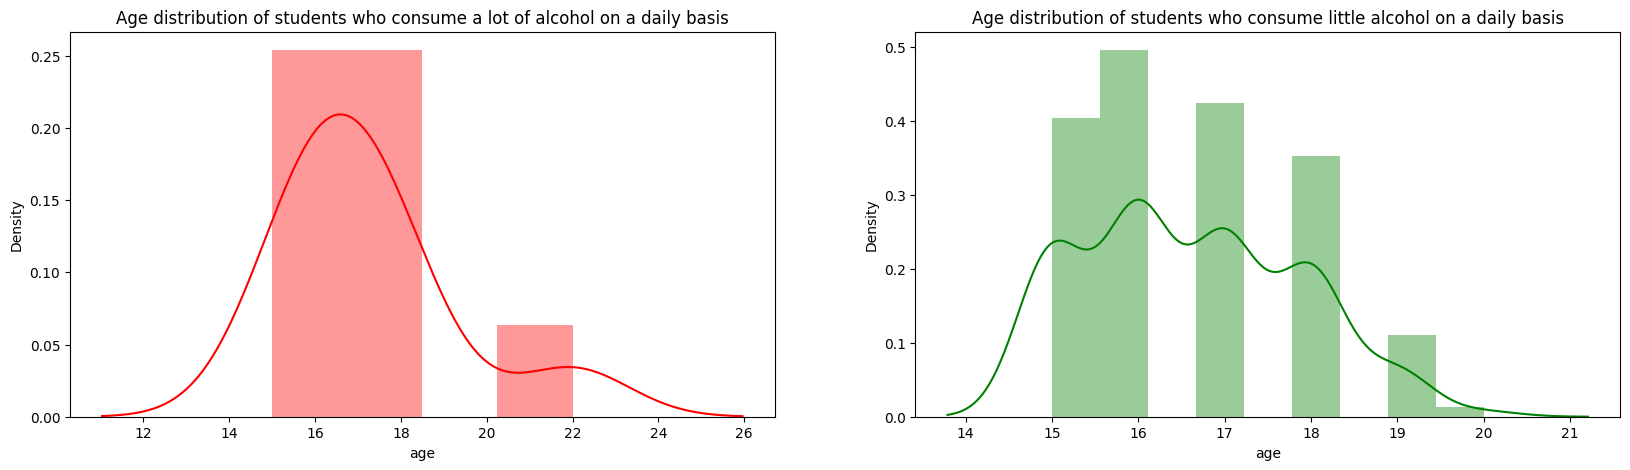

In [30]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["age"],color='red',ax=ax)
ax.set_title('Age distribution of students who consume a lot of alcohol on a daily basis')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['age'],color='green',ax=ax)
ax.set_title('Age distribution of students who consume little alcohol on a daily basis')

plt.show()

<ipython-input-31-0fba49dbdb4d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["sex"].replace("M", 0).replace("F", 1),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-31-0fba49dbdb4d>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Pl

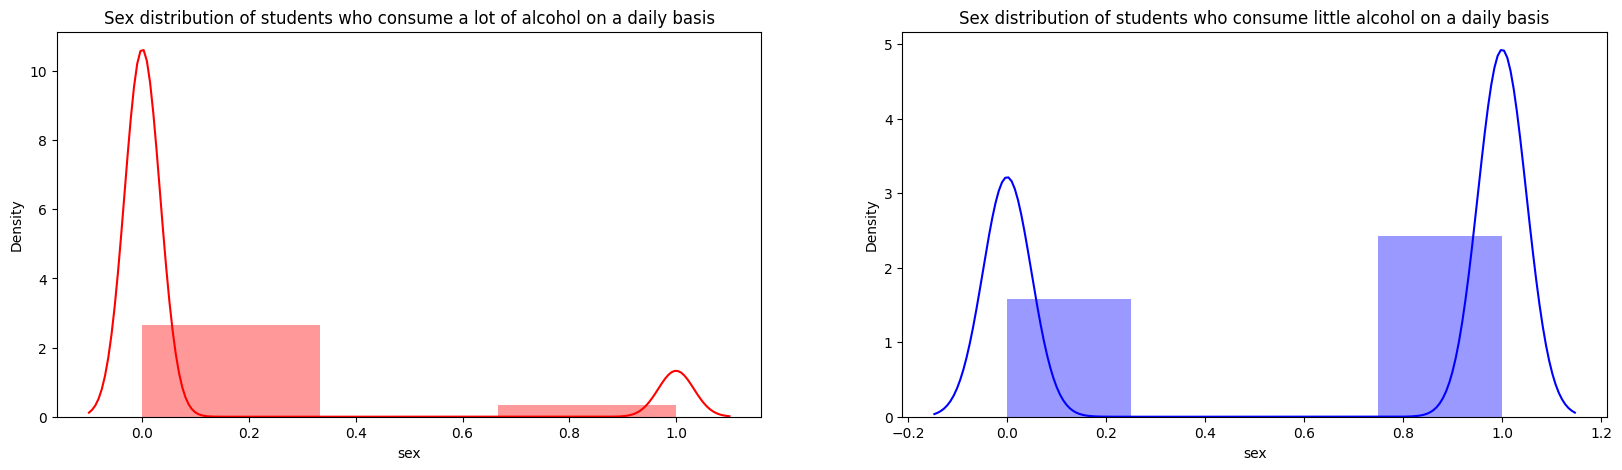

In [31]:
# Female: 0
# Male: 1

f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["sex"].replace("M", 0).replace("F", 1),
             color='red',
             ax=ax,
             kde_kws={'bw':0.1})
ax.set_title('Sex distribution of students who consume a lot of alcohol on a daily basis')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]["sex"].replace("M", 0).replace("F", 1),
             color='blue',
             ax=ax,
             kde_kws={'bw':0.1})
ax.set_title('Sex distribution of students who consume little alcohol on a daily basis')

plt.show()

These other two graphs show how the age of students who consume alcohol on a daily basis is usually higher than that of those who do not, and that students who consume a lot of alcohol on a daily basis are almost entirely men, while they enter students who consume little tend to have more parity, although it is true that the number of women is slightly higher.

#### Influence of personal relationships
Certain information can be gleaned from students' personal relationships

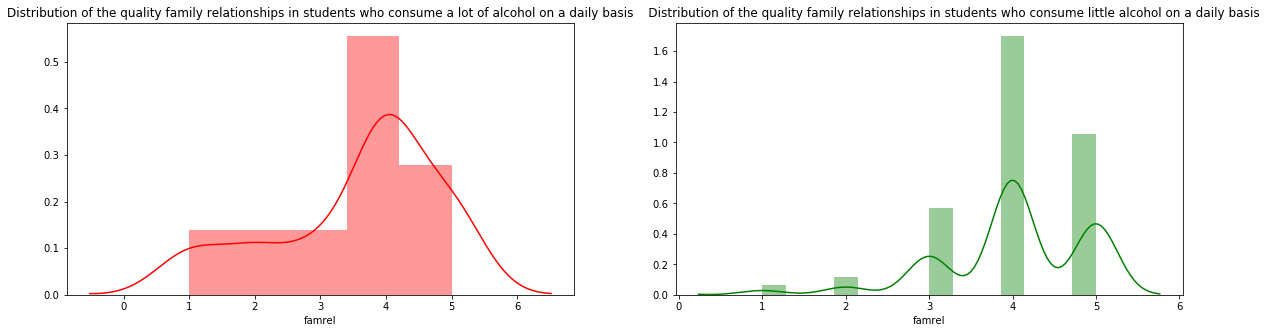

In [ ]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["famrel"],color='red',ax=ax)
ax.set_title('Distribution of the quality family relationships in students who consume a lot of alcohol on a daily basis')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['famrel'],color='green',ax=ax)
ax.set_title('             Distribution of the quality family relationships in students who consume little alcohol on a daily basis')

plt.show()

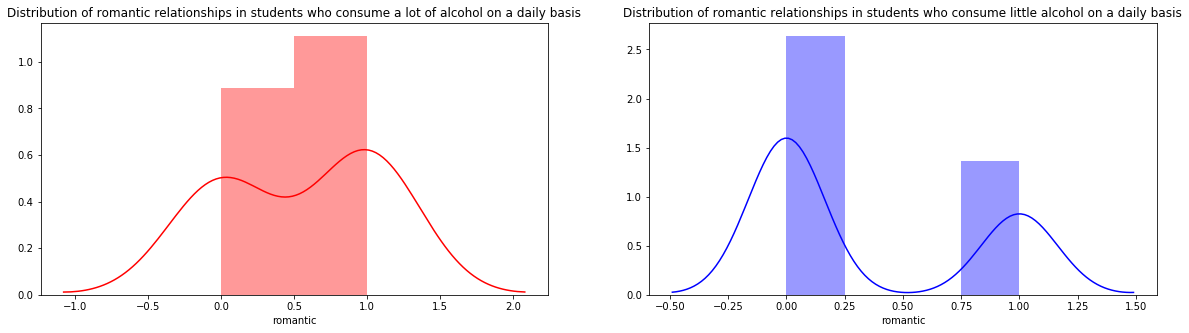

In [ ]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["romantic"].replace(["no", "yes"], [0, 1]),color='red',ax=ax)
ax.set_title('Distribution of romantic relationships in students who consume a lot of alcohol on a daily basis')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['romantic'].replace(["no", "yes"], [0, 1]),color='blue',ax=ax)
ax.set_title('Distribution of romantic relationships in students who consume little alcohol on a daily basis')

plt.show()

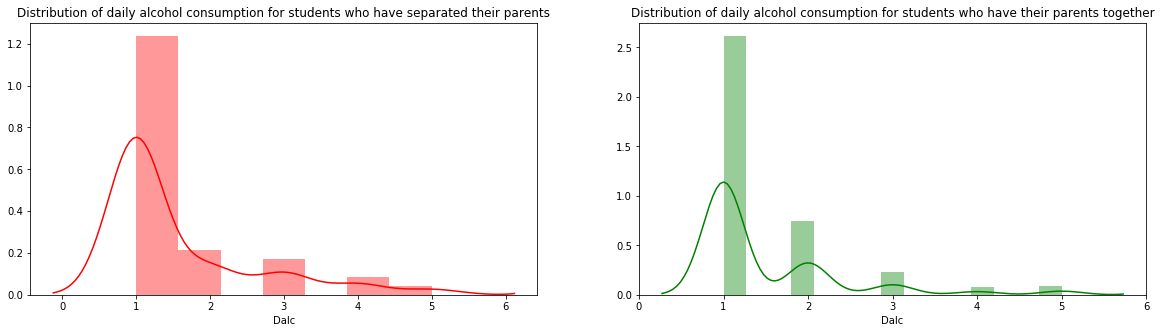

In [ ]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Pstatus"] == "A"]["Dalc"],color='red',ax=ax)
ax.set_title('Distribution of daily alcohol consumption for students who have separated their parents')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Pstatus"] == "T"]['Dalc'],color='green',ax=ax)
ax.set_title('Distribution of daily alcohol consumption for students who have their parents together')

plt.show()

On the one hand, it seems that the quality of family relationships does not have much influence on daily alcohol consumption (something that was already seen in the correlation matrix, since what most influences them is whether or not they go out with friends). Similarly, whether or not they have a romantic relationship does not have much influence, although it varies a bit for both cases. Similarly, whether or not the parents are separated does not affect the students' alcohol consumption.

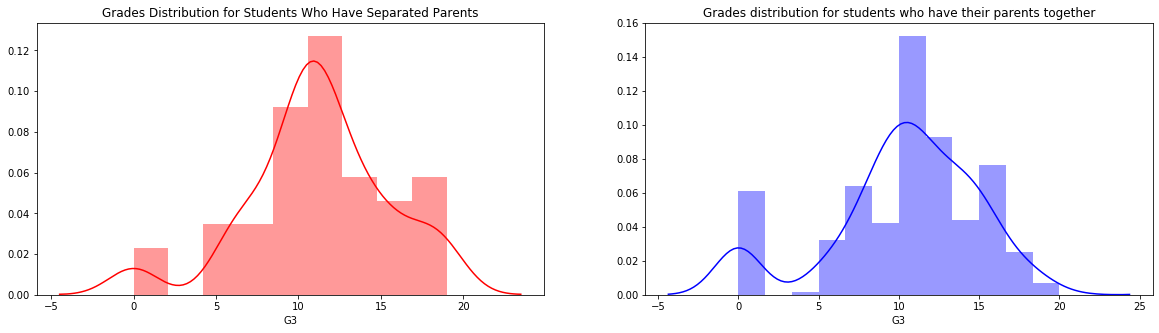

In [ ]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Pstatus"] == "A"]["G3"],color='red',ax=ax)
ax.set_title('Grades Distribution for Students Who Have Separated Parents')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Pstatus"] == "T"]['G3'],color='blue',ax=ax)
ax.set_title('Grades distribution for students who have their parents together')

plt.show()

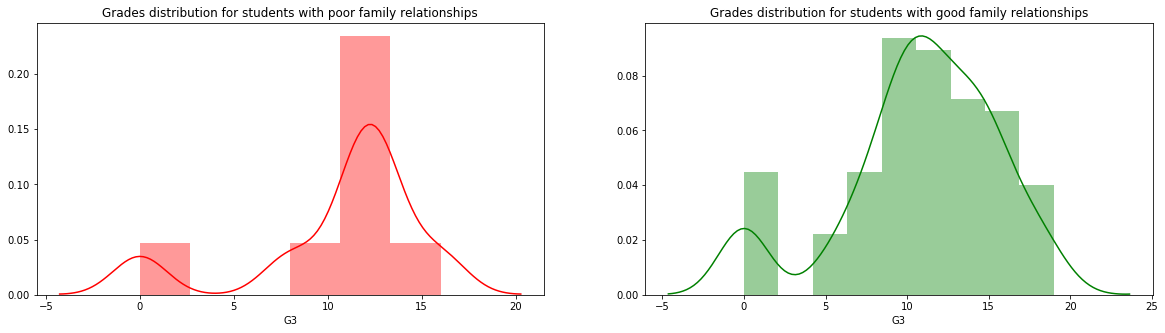

In [ ]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["famrel"] == 1]["G3"],color='red',ax=ax)
ax.set_title('Grades distribution for students with poor family relationships')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["famrel"] == 5]['G3'],color='green',ax=ax)
ax.set_title('Grades distribution for students with good family relationships')

plt.show()

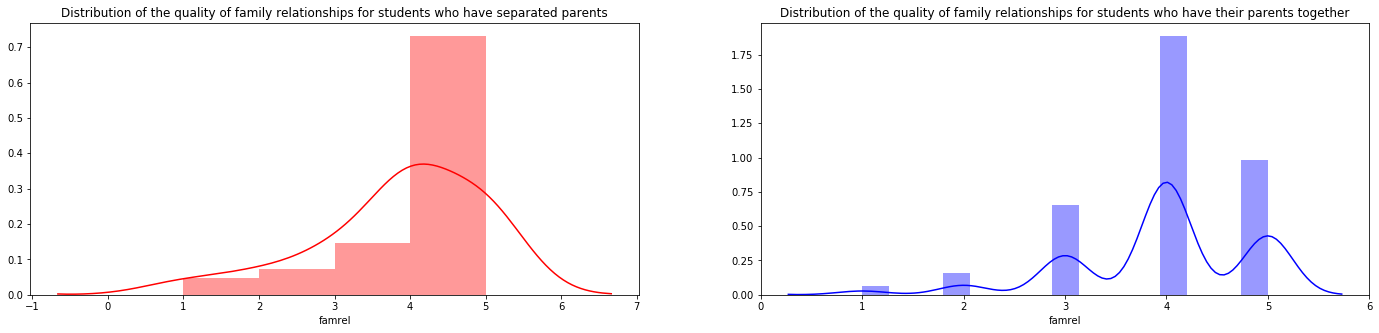

In [ ]:
f= plt.figure(figsize=(24,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Pstatus"] == "A"]["famrel"],color='red',ax=ax)
ax.set_title('Distribution of the quality of family relationships for students who have separated parents')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Pstatus"] == "T"]['famrel'],color='blue',ax=ax)
ax.set_title('Distribution of the quality of family relationships for students who have their parents together')

plt.show()

More striking is the case of the note distributions; In the case that the parents are together, there does not seem to be much difference between the distribution of grades, but there does seem to be one when the students say that the quality of their family relationships is good. If family relationships are good, their grades improve significantly. In fact, it can be seen that whether or not the parents are separated does not have much influence on how family relationships are.

### 3.2. Correlation Study
One of the first bivariate analyzes is the study of correlations, which must be applied to numerical variables and, in any case, to ordinal categorical variables. If we use Pearson's correlation, strictly speaking only numerical ones should be used, but for Spearman's correlations, both types of variables can be used.

Here we will only use ordinal categorical variables, along with continuous ones, using Spearman's method.

<ipython-input-47-f2fa1668c66d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset_mat[list_ord + list_cont].corr(method=("spearman")), annot=True, fmt=".1f", linewidths=1, ax=ax)


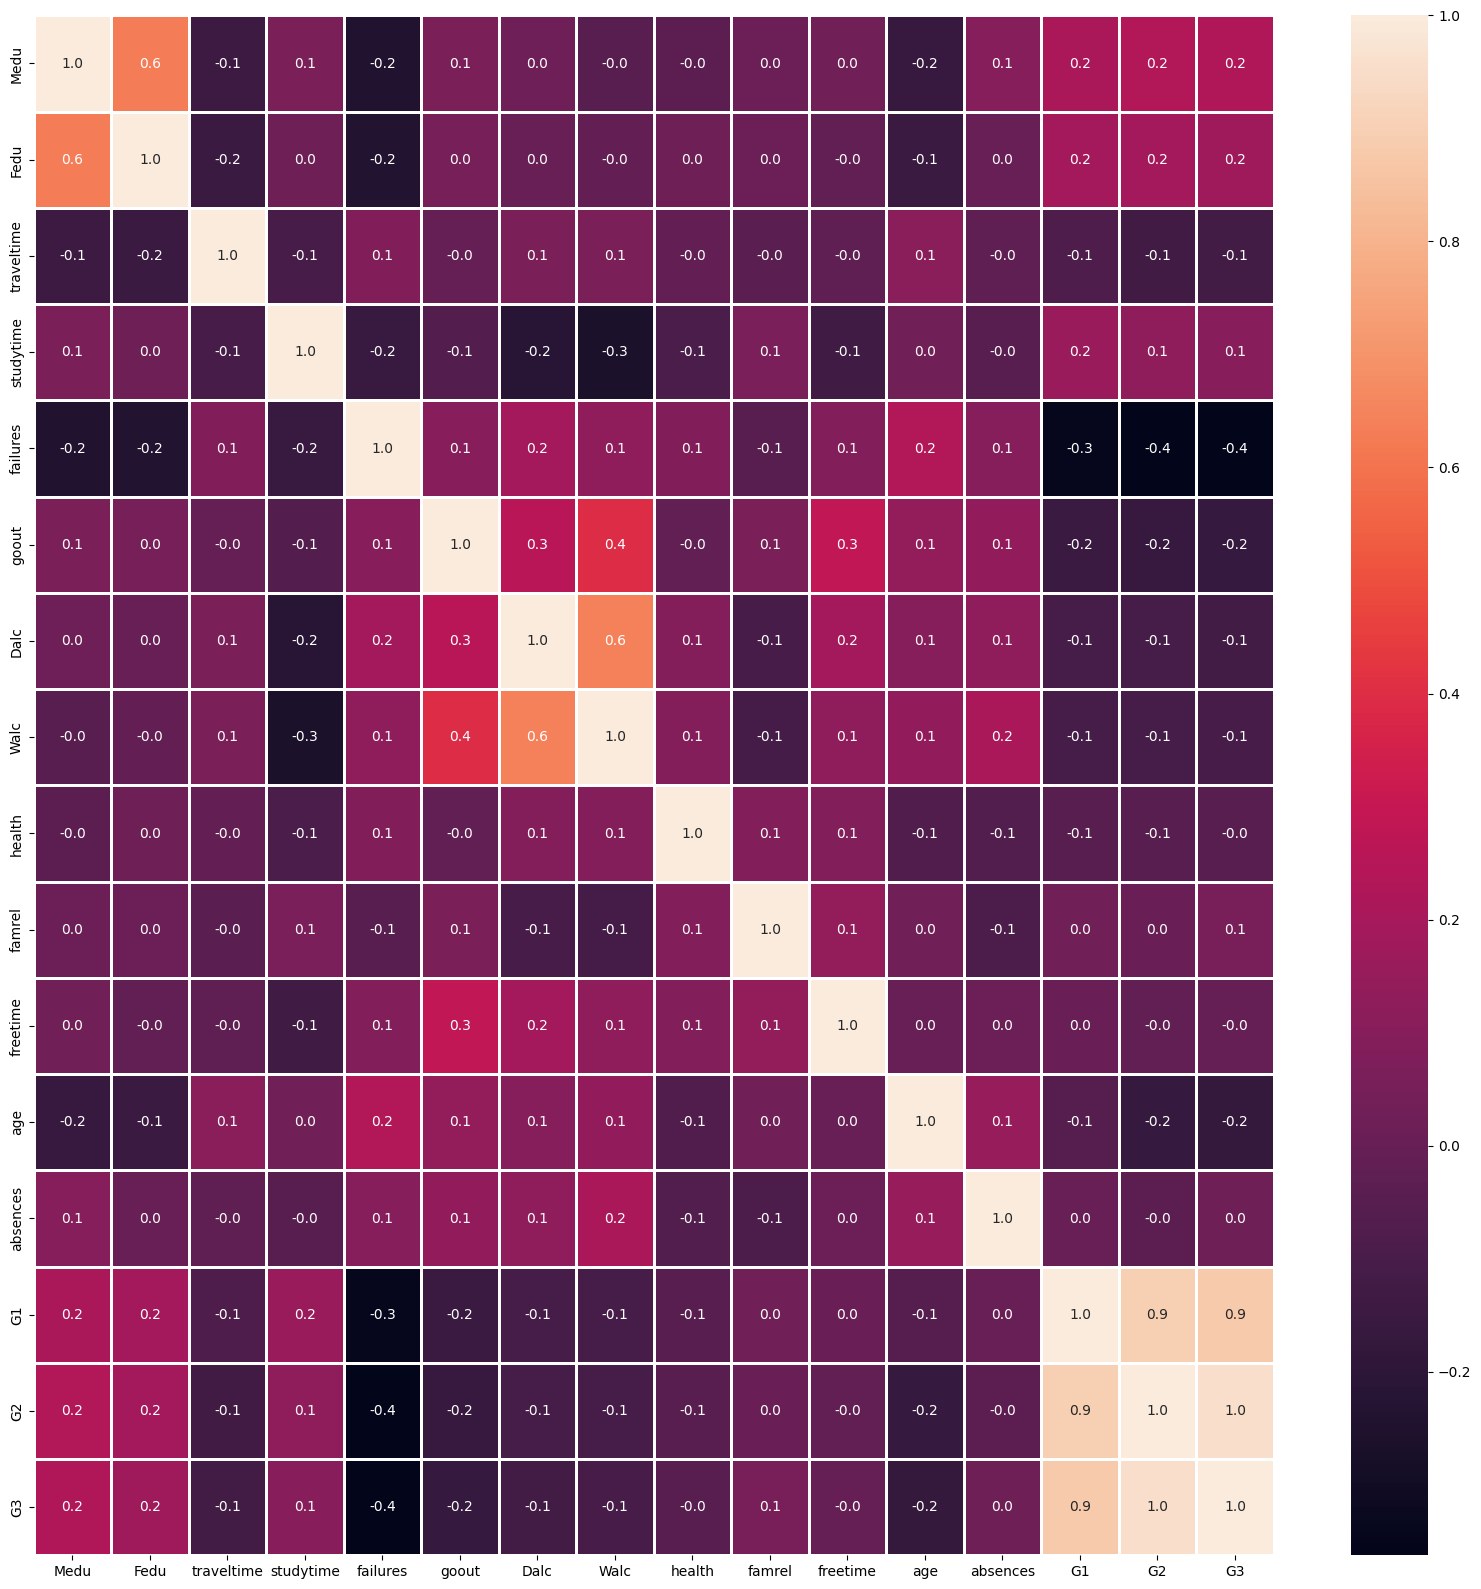

In [47]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(dataset_mat[list_ord + list_cont].corr(method=("spearman")), annot=True, fmt=".1f", linewidths=1, ax=ax)
plt.show()

The analysis of correlations between variables is a fundamental point to understand the variables present in the data set.

• It can be seen how there is a **high correlation** between the variables of grades obtained, something logical in relation to G3 with G1 and G2 since the final average is obtained based on the grades of the two semesters, therefore they are clearly dependent variables . It is also striking that there is a great correlation between the grades of the two semesters, so that what a student obtains in one of them will greatly condition what he will obtain in the next; that is, there is a dependency relationship between the academic performance of the two semesters. In any case, for an ML application it would be sufficient to choose one of the three notes, possibly using the G3 average score directly.

• There is also a relationship between the education of the mother (**Medu**) and that of the father (**Fedu**), since they have a correlation of 0.6; In this way, the fact that there is a dependency between the studies carried out by the different spouses seems curious. Since the correlation is positive, it could be interpreted as that couples with similar levels of education usually occur.

• Similarly, there is a **correlation of 0.6**, and therefore positive, between daily alcohol consumption (**Dalc**) and on weekends (**Walc**). In this way, it seems that whether or not to consume alcohol on a daily basis influences whether or not alcohol is consumed on the weekend.

• As could be expected, there is also a correlation, in this case negative, between the previous failures (Failures) and the grades obtained (G1, G2 and G3), with a value of -0.4. In this way, the more failures that have been previously had, the worse grades one would expect to obtain.

• Another pair of variables with a negative correlation is alcohol consumption at the weekend (Walc) with time spent studying (studytime), with a value of -0.3. In this way, it would seem that students who consume more alcohol on weekends spend less time studying.

• In turn, with a correlation of 0.4, the variables of alcohol at the weekend (Walc) and going out with friends (goout) appear. So the students who go out the most tend to consume more alcohol.

• The rest of the variables seem quite independent, even having correlations of value 0 (totally independent)

Note:

• The Pandas library offers three possible correlation methods: pearson, kendall, and spearman. To work with variables that are not continuous but are ordinal (such as categorical ones converted to a numerical value, where the value is higher does not mean anything since they are different categories) it is not good to use Pearson's correlation since this it has among its presuppositions that the variables are continuous. For this reason, it is preferred to use Spearman's correlation, although this is not the best method for analyzing relationships between categorical-numerical or categorical-categorical variables. Still it is an interesting first approximation to see how the variables are related

### 3.3 Hypothesis Testing for continuous variables

As the output variable is continuous, we can see if the mean value of said variable for each group of categorical variables is significantly different. To do this, we apply hypotheses testing with the Tukey test. We are going to analyze the non-ordinal categorical variables together with all the binary ones.

In Tukey's test, we have to first pass the column with the numerical variable as a parameter, and then the column with the categorical variable to separate by groups.

In [48]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

for column in list(set((list_not_ord + list_binary))): #list(set()) To combine both lists and not have repeated values
    print("*"*100)
    print("Hypothesis contrast for G3 - {0}".format(column))
    MultiComp = MultiComparison(dataset_mat['G3'],
                                dataset_mat[column])
    print(MultiComp.tukeyhsd().summary())

    list_unique = list(dataset_mat[column].unique())
    for cat in list_unique:
        mean_iter = np.round(dataset_mat[dataset_mat[column]==cat]['G3'].mean(), 2)
        print("Mean for {0}=={1}: {2}".format(column, cat, mean_iter))
        print()

    print("*"*100)
    print()

****************************************************************************************************
Hypothesis contrast for G3 - Mjob
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
 at_home   health   2.9945 0.0189  0.3281  5.661   True
 at_home    other   0.6702 0.8743   -1.25 2.5903  False
 at_home services   1.8669 0.0861 -0.1551 3.8888  False
 at_home  teacher   1.8992 0.1559 -0.3907  4.189  False
  health    other  -2.3244 0.0569 -4.6904 0.0417  False
  health services  -1.1276 0.7149  -3.577 1.3218  False
  health  teacher  -1.0953 0.7947 -3.7702 1.5795  False
   other services   1.1967 0.2474 -0.4085 2.8019  False
   other  teacher    1.229 0.4085 -0.7028 3.1608  False
services  teacher   0.0323    1.0 -2.0007 2.0653  False
-------------------------------------------------------
Mean for Mjob==at_home: 9.15

Mean for Mjob==health: 12.15

Mean for Mjob==other:

We can see how significant differences appear for the means in the grades depending on the variables: "sex", "romantic", "address", "paid", "higher", and for the case of the groups "at_home" and "health" from mothers' work (MJob).

Analyzing the means, it is seen that:
* In the data set, men have a significantly higher average grades than women
* If the mother works at home, the students' grades are significantly better than if she works in the health sector
* Not having romantic relationships has a positive impact on grades, leading to higher grade point average
* Living in an urban environment also seems to contribute to significantly higher grades than those of students living in rural environments.
* Having extra classes of this subject contributes to having better grades
* If they want to study higher education, the means are significantly higher than if they do not want to. The average of the grades is almost double.

The rest of these variables do not seem to have a very significant impact on the grade.

This hypothesis test step, together with the correlation analysis, are the key steps to truly quantify the influence of the different variables on the output. Visual analyzes are useful to explain this, but it is essential to perform statistical quantitative analyzes to ensure conclusions.

With these analyzes already clear, we are going to visualize the distribution of scores for some of these significantly different cases.

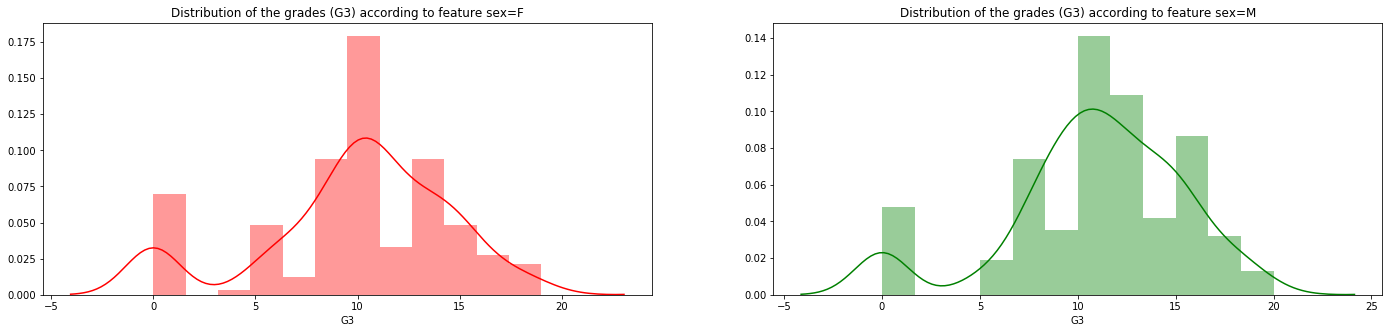

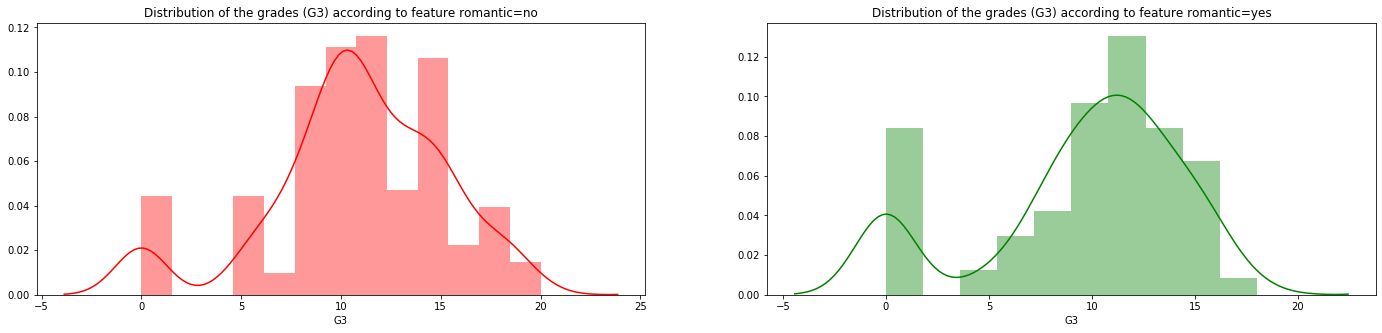

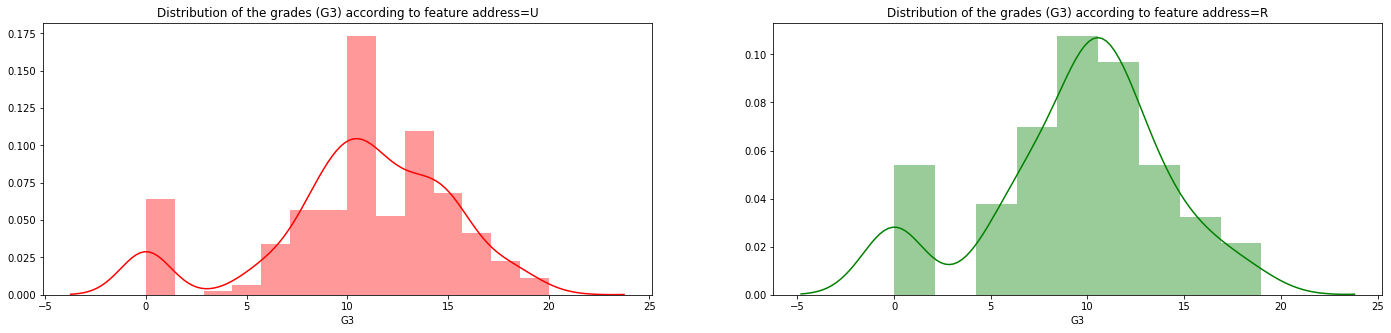

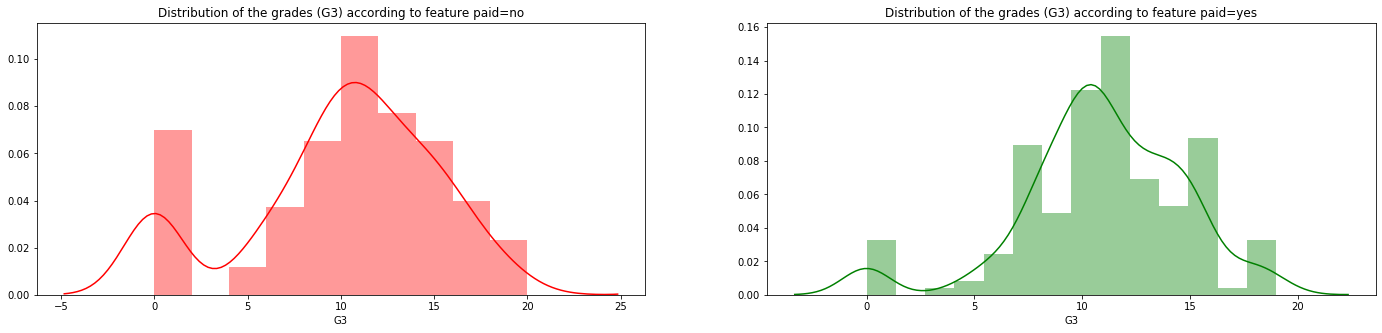

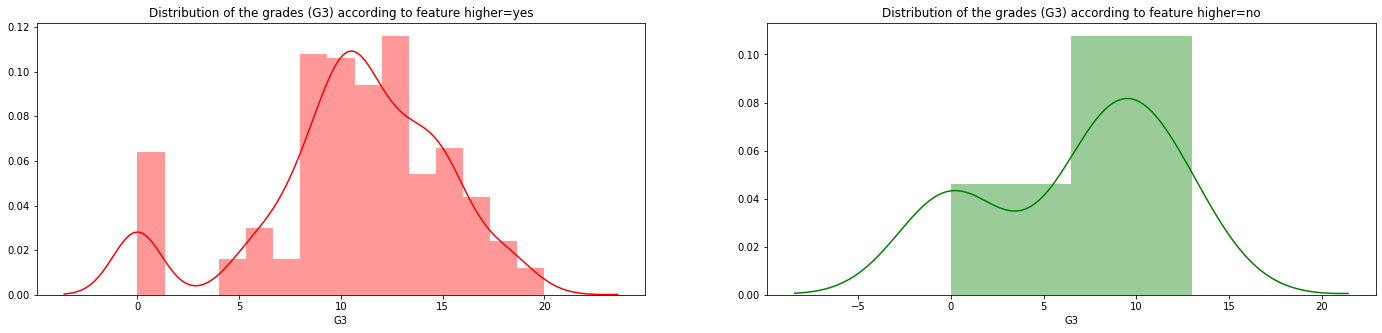

In [ ]:
list_plot = ['sex', 'romantic', 'address', 'paid', 'higher']

for column in list_plot:

    list_values = dataset_mat[column].unique()

    f= plt.figure(figsize=(24,5))
    ax=f.add_subplot(121)
    sns.distplot(dataset_mat[dataset_mat[column] == list_values[0]]["G3"],color='red',ax=ax)
    ax.set_title('Distribution of the grades (G3) according to feature {0}={1}'.format(column, list_values[0]))

    ax=f.add_subplot(122)
    sns.distplot(dataset_mat[dataset_mat[column] == list_values[1]]['G3'],color='green',ax=ax)
    ax.set_title('Distribution of the grades (G3) according to feature {0}={1}'.format(column, list_values[1]))

    plt.show()

## 4. Feature selection and data preparation

### 4.1 Train / Test split

At this point, the data set will be divided into a training and test set. Although not all supervised ML models need the variables to be standardized, we are going to standardize them anyways so that we do not have to be working with different data sets depending on the model. We start from the previous dataset with labelencoding.

We also scale the data

In [49]:
# Split into input / output variables
X = dataset2.drop(columns=["G3"])
y = dataset2["G3"]

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 4.2. Feature selection based on the EDA
With the previous EDA we can decide which features to use for the model. For this first analysis, we will choose from among the numerical features and the ordinal categorical features those that have a correlation with respect to the output variable of at least 0.21.

Regarding the non-ordinal categorical features (binary and multiclass), we will choose those that have rejected H0 in the hypothesis test and that therefore their groups have differences in the mean value of the output feature.

If we want to predict the final grade, two models could be proposed: one that made its prediction before starting the course (that is, that there was no grade for any semester yet) or another that would do so during the course when it was already available. the qualification of any of the semesters.

As seen in the EDA, the grades obtained during the semesters greatly influence the final grade (there is a lot of correlation), so apparently they could be very useful features to predict the final grade. However, in the first place and simulating that we want to be able to predict the grades as soon as possible, we will work without that knowledge of the semester grades and trying to predict the final grade of the student based on their profile data, to which we would have access from the beginning of the course.

A final comment is that the predictor features should not have an excessive correlation between them (not exceed 0.8) since they would be essentially the same feature. We do not check this point automatically since we had already seen that it did not occur in any case.

In [51]:
# Variable selection based on correlations
df_ordinal = dataset_mat[list_ord + list_cont].corr()['G3'].reset_index().rename(columns={'index':'variable'})
df_ordinal = df_ordinal[~df_ordinal['variable'].isin(['G3', 'G2', 'G1'])]
df_ordinal = df_ordinal[abs(df_ordinal['G3'])>=0.21]

# We add the variables resulting from the hypothesis test
list_chosen_ordinal = list(df_ordinal['variable'].values)
list_chosen_not_ordinal = ['sex', 'romantic', 'address', 'paid', 'higher', 'MJob']
list_chosen = list_chosen_ordinal + list_chosen_not_ordinal

# We eliminate duplicates
list_chosen = list(set(list_chosen))
print(list_chosen)

['MJob', 'higher', 'Medu', 'romantic', 'sex', 'failures', 'address', 'paid']


<ipython-input-51-d2b313ec6dc7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ordinal = dataset_mat[list_ord + list_cont].corr()['G3'].reset_index().rename(columns={'index':'variable'})


### 4.3. Feature selection according to the linear regression model

Another way to select the influential features, without directly using the EDA, is to build (in the case of a regression model) a logistic regression model with which the potentially influential features are selected. This has the handicap that the features will be chosen based on their predictive power in a linear model, but it could happen that a feature that does not have a linear relationship with the output, does have a non-linear relationship, which could be captured with more complex models.

In addition, the hypotheses of the linear regression model should be fulfilled with the data in order to apply this approximation.

In [52]:
# Id columns
df_aux = dataset2.drop(columns=["G3"]).copy()
[print("x{0}: {1}".format(i+1, x)) for i,x in zip(range(len(df_aux)), df_aux.columns)]
print()

x1: age
x2: famsize
x3: Medu
x4: Fedu
x5: traveltime
x6: studytime
x7: failures
x8: schoolsup
x9: famsup
x10: paid
x11: activities
x12: nursery
x13: higher
x14: internet
x15: famrel
x16: freetime
x17: goout
x18: Dalc
x19: Walc
x20: health
x21: absences
x22: G1
x23: G2
x24: sex_M
x25: school_MS
x26: address_U
x27: Pstatus_T
x28: romantic_yes
x29: Mjob_health
x30: Mjob_other
x31: Mjob_services
x32: Mjob_teacher
x33: Fjob_health
x34: Fjob_other
x35: Fjob_services
x36: Fjob_teacher
x37: reason_home
x38: reason_other
x39: reason_reputation
x40: guardian_mother
x41: guardian_other



In [54]:
import statsmodels.api as sm

# In a generic way we can see the influence of parameters in a multiple linear regression
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     G3   R-squared (uncentered):                   0.114
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.6969
Date:                Sat, 21 Oct 2023   Prob (F-statistic):                       0.916
Time:                        17:02:10   Log-Likelihood:                         -998.13
No. Observations:                 263   AIC:                                      2078.
Df Residuals:                     222   BIC:                                      2225.
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2954      1.008     -0.293      0.770      -2.282       1.692
x2            -0.0255      0.788     -0.032      0.974      -1.579       1.528
x3             0.1496      1.244      0.120      0.904      -2.302       2.601
x4            -0.0718      1.048     -0.069      0.945      -2.137       1.993
x5             0.0787      0.855      0.092      0.927      -1.607       1.765
x6             0.0617      0.891      0.069      0.945      -1.695       1.818
x7             0.0466      0.922      0.051      0.960      -1.771       1.864
x8             0.1736      0.856      0.203      0.840      -1.514       1.861
x9             0.0641      0.833      0.077      0.939      -1.578       1.706
x10            0.0664      0.851      0.078      0.938      -1.611       1.744
x11           -0.1581      0.792     -0.200      0.842      -1.718       1.402
x12           -0.1831      0.813     -0.225      0.822      -1.786       1.420
x13            0.0922      0.840      0.110      0.913      -1.563       1.747
x14           -0.1061      0.809     -0.131      0.896      -1.700       1.488
x15            0.1464      0.788      0.186      0.853      -1.407       1.700
x16            0.0254      0.871      0.029      0.977      -1.691       1.742
x17            0.0497      0.900      0.055      0.956      -1.724       1.823
x18           -0.1794      1.068     -0.168      0.867      -2.284       1.925
x19            0.2216      1.182      0.187      0.851      -2.108       2.551
x20            0.1362      0.797      0.171      0.864      -1.434       1.706
x21            0.4131      0.838      0.493      0.622      -1.238       2.064
x22            0.4562      1.524      0.299      0.765      -2.547       3.459
x23            3.4055      1.509      2.257      0.025       0.432       6.379
x24            0.1575      0.893      0.176      0.860      -1.602       1.917
x25            0.1349      0.929      0.145      0.885      -1.697       1.967
x26            0.1222      0.899      0.136      0.892      -1.649       1.894
x27           -0.0640      0.795     -0.081      0.936      -1.630       1.502
x28           -0.1428      0.796     -0.179      0.858      -1.711       1.426
x29            0.0247      1.083      0.023      0.982      -2.109       2.159
x30           -0.0748      1.259     -0.059      0.953      -2.555       2.406
x31           -0.1795      1.253     -0.143      0.886      -2.650       2.291
x32           -0.0680      1.287     -0.053      0.958      -2.604       2.468
x33           -0.0113      1.025     -0.011      0.991      -2.032       2.009
x34           -0.1531      1.887     -0.081      0.935      -3.872       3.565
x35           -0.0528      1.786     -0.030      0.976      -

In [55]:
# Chosen features
list_chosen_regression = [x for x,y in zip(list(df_aux.columns), model.pvalues) if y <= 0.05]
list_chosen_regression

['G2']

With this, the features that have a pvalue less than 0.05 would be selected.

### 4.4. Automatic feature selection
There are other techniques to automatically extract potentially relevant features for a prediction model. A good reference to this is the scikit-learn library itself: https://scikit-learn.org/stable/modules/feature_selection.html

As an example, we are go**ing to see how to apply the RFE (Recursive Feature Elimination**) algorithm, which is applied to a model to select the relevant features. The number of selected features is chosen by us.

In [57]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, random_state=42)
selector = RFE(model, n_features_to_select=15, step=1)
selector = selector.fit(X_train, y_train)

In [58]:
# Chosen features
list_chosen_rfe = [x for x,y in zip(list(df_aux.columns), selector.support_) if y]
list_chosen_rfe

['age',
 'Medu',
 'Fedu',
 'studytime',
 'schoolsup',
 'paid',
 'activities',
 'famrel',
 'freetime',
 'goout',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

## 5. Supervised Model

### 5.1. Feature selection
In this step, we choose the relevant features based on the previous analyzes. We are going to select them according to the EDA. We first need to find the mapping of the name of the non-ordinal categorical columns to the name that is left after the onehot encoding.

In [59]:
# Choose column names considering the onehot encoding
list_all_chosen = []
for column in list(dataset2.columns):
    for x in list_chosen_not_ordinal:
        if x in column:
            list_all_chosen += [column]
list_all_chosen += list_chosen_ordinal
list_all_chosen

['paid', 'higher', 'sex_M', 'address_U', 'romantic_yes', 'Medu', 'failures']

In [60]:
# Cast to dataframe
X_train = pd.DataFrame(X_train)
X_train.columns = list(dataset2.drop(columns=['G3']).columns)
X_test = pd.DataFrame(X_test)
X_test.columns = list(dataset2.drop(columns=['G3']).columns)

# Select columns
print(X_train.shape, X_test.shape)
X_train = X_train[list_all_chosen]
X_test = X_test[list_all_chosen]
print(X_train.shape, X_test.shape)
X_train.head()

(263, 41) (132, 41)
(263, 7) (132, 7)


,paid,higher,sex_M,address_U,romantic_yes,Medu,failures
0,1.100038,0.218652,1.026980,0.602241,1.410190,-1.610152,-0.463054
1,-0.909059,0.218652,-0.973729,-1.660465,1.410190,-0.677399,-0.463054
2,-0.909059,0.218652,-0.973729,0.602241,-0.709124,0.255354,-0.463054
3,-0.909059,-4.573474,1.026980,0.602241,1.410190,0.255354,3.736369
4,-0.909059,0.218652,1.026980,0.602241,1.410190,1.188108,-0.463054


In [61]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### 5.2 Regression Models
For the case of a regression problem, the output variable is left as is, trying to predict its continuous value.

The main goal will be to build a few diverse models and see which one gives better results while generalizing better. For guidance purposes only, the scikit-learn algorithm selection guide can be used as a reference: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

This would propose for the problem you are working with to use a RidgeRegression or an SVR with linear kernel



#### RidgeRegression
To apply linear regression, we previously need to confirm that the hypotheses are fulfilled

In [62]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     G3   R-squared (uncentered):                   0.020
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                             0.7638
Date:                Sat, 21 Oct 2023   Prob (F-statistic):                       0.618
Time:                        17:04:00   Log-Likelihood:                         -1011.3
No. Observations:                 263   AIC:                                      2037.
Df Residuals:                     256   BIC:                                      2062.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
paid            -0.1069      0.730     -0.146      0.884      -1.545       1.331
higher           0.4717      0.748      0.631      0.529      -1.001       1.944
sex_M            0.4434      0.729      0.608      0.544      -0.992       1.879
address_U        0.5906      0.719      0.821      0.412      -0.826       2.007
romantic_yes    -0.4027      0.720     -0.560      0.576      -1.820       1.015
Medu             0.5518      0.758      0.728      0.467      -0.941       2.044
failures        -0.8244      0.751     -1.098      0.273      -2.302       0.654
==============================================================================
Omnibus:                       29.495   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.881
Skew:                          -0.805   Prob(JB):                     9.80e-09
Kurtosis:                       3.878   Cond. No.                         1.59
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Normality of residuals
r2 0.9582483884887306
Homoscedasticity
p-value:  0.3372697870403281
Autocorrelation errors
0.23176319559829606


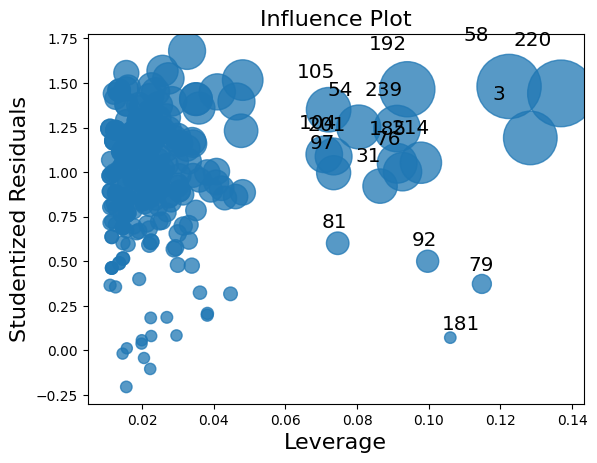

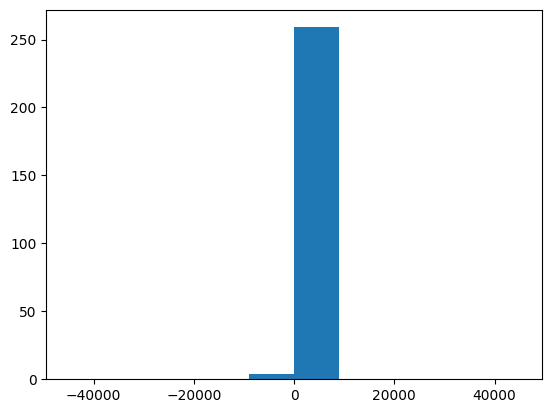

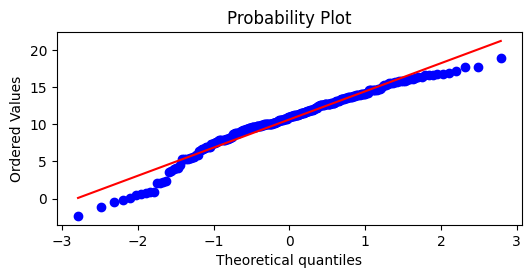

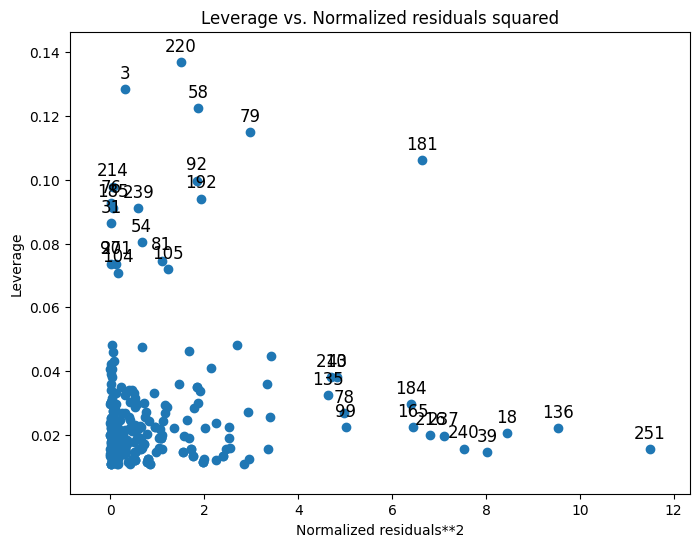

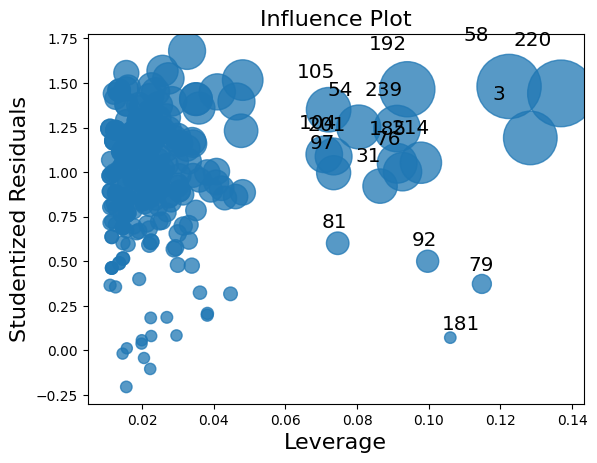

In [63]:
# Linear Regression Hypothesis
import statsmodels.stats.api as sms

#### Normality of residuals
# Obtaining residuals
from statsmodels.compat import lzip
residuos = model.resid
# Histograms
plt.hist(residuos, range=(-45000, 45000))

# Q-Q Plot
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residuos, plot=ax, fit=True)

print("Normality of residuals")
print("r2", r**2)

### Check Homoscedasticity
# Goldfeld-Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)

print("Homoscedasticity")
print("p-value: ", test[1])

### Autocorrelation errors
from statsmodels.stats.stattools import durbin_watson
print("Autocorrelation errors")
print(durbin_watson(residuos))

### Checking the influence of possible outliers
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(model)
test_class.dfbetas[:5,:]

from statsmodels.graphics.regressionplots import plot_leverage_resid2, influence_plot
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model, ax = ax)
influence_plot(model)

The basic hypotheses for a linear regression are fulfilled; the existence of outliers within the model is effectively appreciated.

In [64]:
# Ridge Fit
model = sm.OLS(y_train, X_train).fit_regularized(L1_wt = 0) # Ridge

# Model predictions
y_pred = model.predict(X_test).round().astype("int") # Rounding to have integer values, which is what corresponds to each nota

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

r2 = np.round(r2_score(y_test, y_pred), 4)
mse = np.round(mean_squared_error(y_test, y_pred), 4)
mae = np.round(mean_absolute_error(y_test, y_pred), 4)
rmse = np.round(math.sqrt(mse), 4)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

r2: -3.3873  mae: 10.0076  mse: 121.7348  rmse: 11.0333


#### SVR (Kernel = lineal)

In [65]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

# Model predictions
y_pred = regressor.predict(X_test).round().astype("int")

r2 = np.round(r2_score(y_test, y_pred), 4)
mse = np.round(mean_squared_error(y_test, y_pred), 4)
mae = np.round(mean_absolute_error(y_test, y_pred), 4)
rmse = np.round(math.sqrt(mse), 4)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

r2: 0.1102  mae: 3.8106  mse: 24.6894  rmse: 4.9688


#### SVR (Kernel = rbf)

In [66]:
# Original data
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Model predictions
y_pred = regressor.predict(X_test).round().astype("int")

r2 = np.round(r2_score(y_test, y_pred), 4)
mse = np.round(mean_squared_error(y_test, y_pred), 4)
mae = np.round(mean_absolute_error(y_test, y_pred), 4)
rmse = np.round(math.sqrt(mse), 4)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

r2: 0.0826  mae: 3.8182  mse: 25.4545  rmse: 5.0452


#### K-Means

In [67]:
from sklearn import neighbors

n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
y1_knn=knn.predict(X_train)
y1_knn=list(y1_knn)

train_error_knn = np.mean(abs(y1_knn-y_train))
print(train_error_knn)

# Model predictions
y_pred = knn.predict(X_test).round().astype("int")

r2 = np.round(r2_score(y_test, y_pred), 4)
mse = np.round(mean_squared_error(y_test, y_pred), 4)
mae = np.round(mean_absolute_error(y_test, y_pred), 4)
rmse = np.round(math.sqrt(mse), 4)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

2.642585551330798
r2: 0.0671  mae: 3.9924  mse: 25.8864  rmse: 5.0879


Conclusion:

Apparently, the SVR model with Linear Kernel gives the best results (lower error metrics and higher r2). However, the results are quite unsatisfactory. The r2 is very low. There are several lines of work from it. 1) Test with more variables (include some of the discarded variables) to see if the model's metrics improve, 2) Test with more sophisticated regression models, or 3) Test with a classification model, as we will see below.

### 5.3. Classification Model
To try to improve the predictions, as in the end what is important is to detect students who can potentially fail, the regression problem can be converted to a classification problem where it is classified into two categories: failure, if the grade is <10, and passed in case it is> 10.

In [69]:
# Combine X/y in a new dataframe
df_chosen = X[list_all_chosen].copy()
df_chosen['G3'] = y
df_chosen.head()

,paid,higher,sex_M,address_U,romantic_yes,Medu,failures,G3
0,0,1,0.0,1.0,0.0,4,0,6
1,0,1,0.0,1.0,0.0,1,0,6
2,1,1,0.0,1.0,0.0,1,3,10
3,1,1,0.0,1.0,1.0,4,0,15
4,1,1,0.0,1.0,0.0,3,0,10


In [70]:
# Conversion to a categorical variable
mask = df_chosen["G3"] <= 10
column_name = 'G3'
df_chosen.loc[mask, column_name] = 0

mask = df_chosen["G3"] > 10
column_name = 'G3'
df_chosen.loc[mask, column_name] = 1

df_chosen.head()

,paid,higher,sex_M,address_U,romantic_yes,Medu,failures,G3
0,0,1,0.0,1.0,0.0,4,0,0
1,0,1,0.0,1.0,0.0,1,0,0
2,1,1,0.0,1.0,0.0,1,3,0
3,1,1,0.0,1.0,1.0,4,0,1
4,1,1,0.0,1.0,0.0,3,0,0


In [71]:
# Distribution of the output variable
print(df_chosen['G3'].value_counts())
print()
print(df_chosen['G3'].value_counts()/len(df_chosen))

1    209
0    186
Name: G3, dtype: int64

1    0.529114
0    0.470886
Name: G3, dtype: float64


In [72]:
# Split into input / output variables
X = df_chosen.drop(columns=["G3"]).values
y = df_chosen["G3"].values

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [73]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### SVM (Kernel = lineal)

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Metrics
f1 = np.round(f1_score(y_test, y_pred), 4)
precision = np.round(precision_score(y_test, y_pred), 4)
recall = np.round(recall_score(y_test, y_pred), 4)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("precision:", precision, " recall:", recall, " f1:", f1)

[[23 45]
 [ 3 61]]
precision: 0.5755  recall: 0.9531  f1: 0.7176


We can see how there are certain classes (specifically that of failures) where the models tend, as a general rule, to fail more; students who are going to fail tend to be detected worse

#### SVC

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Model
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Metrics
f1 = np.round(f1_score(y_test, y_pred), 4)
precision = np.round(precision_score(y_test, y_pred), 4)
recall = np.round(recall_score(y_test, y_pred), 4)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("precision:", precision, " recall:", recall, " f1:", f1)

[[26 42]
 [12 52]]
precision: 0.5532  recall: 0.8125  f1: 0.6582


Comparatively, SVM with Linear Kernel is getting better results.